# Boundary Value Problem

As opposed to initial value problems, [Boundary value problems](https://en.wikipedia.org/wiki/Boundary_value_problem) is a class of differential equation together with a set of additional constraints (boundary conditions). A BVP with second order D.E has the form : 

$$
\frac{d^2y}{dx^2}\ =\ f\left(x, y(x), y^{\prime}(x)\right),\quad y(x_0) = a,\quad y(x_n) = b
$$

Unlike initial value problems, a BVP has no unique solution. Some of theqniques used for finding solution are described here:

## Shooting Method

In this approach, we convert the BVP to Initial Value Problem(IVP). So, if we take $u_\alpha$ to be the solution of the IVP, equivalent to the previous BVP, then it has the form :
$$
\frac{d^2u_\alpha}{dx^2}\ =\ f\left(x, u_\alpha(x), u_\alpha^{\prime}(x)\right),\quad u_\alpha(x_0) = a,\quad u^\prime_\alpha(x_0) = \alpha
$$

Here, $\alpha$ is choosen with an educated guess. Because of this guess, the value of this function $u_\alpha(x)$ at $x=x_n$ will not be same as $y(x_n)$. Let us take the difference as $g(\alpha)$, since the this depends on $\alpha$. Thus we have : 

$$
g(\alpha)\ =\ u_\alpha(x_n) - y(x_n)\ =\ u_\alpha(x_n) - b \qquad\qquad \because y(x_n) = \alpha
$$

So, inorder to solve this set of equations, one has to find zero of equation above. Here are some expamples using different methods:

### Bisection Shooting Method

**Question :** solve the D.E :

$$
y^{\prime\prime} + 4y^\prime\ =\ 5x, \quad y(0)=1, \quad y(1)=0
$$
**Solution :**
Lets convert this to a initial value problem. 

$$
u_\alpha^{\prime\prime} + 4u_\alpha^\prime\ =\ 5x, \quad u_\alpha(0)=1, \quad u^\prime_\alpha(0)=\alpha
$$

lets pick initial values of $\alpha$ are 0 and 5, so that when we take it as 0 and solve, $u_\alpha(1)<0$ and for 5, $u_\alpha(1)>0$. Lets try implimenting a runge kutta method for finding D.E

### Runge Kutta 

the equation :

$$
y^{\prime\prime} + 4y^\prime\ =\ 5x
$$

can be split into two differential equations by substituting for $y^\prime = u$, so that the equation becomes

\begin{align}
\frac{dy}{dx} &= u \\[0.5em]
\frac{du}{dx} &= 5x-4u
\end{align}

with constraints
$$
y(0) = 1, \quad u(0) = \alpha 
$$

In [1]:
# importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
# defining f(x, u) for derivatve du/dx = f(x, u)
def f(x, u):
    return 5*x - 4*u

# The following function takes a value of alpha and find the solution of the equation
# y'' + 4y' = 5x using Runge-kutta method

def desolve(alpha):
    N = 200                      # Number of samples
    x = np.linspace(0, 1, N)     # Creating the array x
    y = np.zeros(N, dtype=float) # Creating array to store y
    u = np.zeros(N, dtype=float) # Creating array to store u
    dx = x[1] - x[0]
    
    # setting initial values
    y[0] = 1
    u[0] = alpha
    
    # Starting R-K loop
    for i in range(1, N):
        # k_x represents for y(x) and l_x for u(x)
        k1 = u[i-1]
        l1 = f(x[i-1], u[i-1])
        k2 = u[i-1] + (1/2)*l1*dx
        l2 = f(x[i-1] + (1/2)*dx, u[i-1] + (1/2)*l1*dx)
        k3 = u[i-1] + (1/2)*l2*dx
        l3 = f(x[i-1] + (1/2)*dx, u[i-1] + (1/2)*l2*dx)
        k4 = u[i-1] + l3*dx
        l4 = f(x[i-1] + dx, u[i-1] + l3*dx)
        
        # calculating the next y and u values
        y[i] = y[i-1] + (1/6)*dx*(k1 + 2*k2 + 2*k3 + k4)
        u[i] = u[i-1] + (1/6)*dx*(l1 + 2*l2 + 2*l3 + l4)
    # Now, the array y stores the result
    return y

Lets check the result with two initial guess of $\alpha$, $\alpha_1 = 1$ and $\alpha_2 = -10$

In [19]:
desolve(1)[-1]    # last term of solution with alpha = 1

1.6346151809563805

In [22]:
desolve(-10)[-1]   # last term of solution with alpha = 5

-1.0650168118209011

This makes a good guess, since both have opposite sign.

Now, using bisection method to find the value of alpha : 

In [27]:
a = 1
b = -10
# bisection
alpha = (a + b)/2
# final value of solution at alpha
fa = desolve(alpha)[-1]
while abs(fa)>1e-8:
    print("alpha = ", alpha)
    # If the last value of y is positive, then update a, else updtae b
    if fa > 0 :
        a = alpha
    else:
        b = alpha
    # update alpha and fa
    alpha = (a + b)/2
    fa = desolve(alpha)[-1]


alpha =  -4.5
alpha =  -7.25
alpha =  -5.875
alpha =  -5.1875
alpha =  -5.53125
alpha =  -5.703125
alpha =  -5.6171875
alpha =  -5.66015625
alpha =  -5.681640625
alpha =  -5.6708984375
alpha =  -5.66552734375
alpha =  -5.662841796875
alpha =  -5.6614990234375
alpha =  -5.66082763671875
alpha =  -5.660491943359375
alpha =  -5.6603240966796875
alpha =  -5.660408020019531
alpha =  -5.660449981689453
alpha =  -5.660470962524414
alpha =  -5.660460472106934
alpha =  -5.660455226898193
alpha =  -5.660452604293823
alpha =  -5.660451292991638
alpha =  -5.660450637340546
alpha =  -5.660450965166092


In [28]:
alpha

-5.660451129078865

In [29]:
#  Now we  have alpha, we can find the solution
y = desolve(alpha)
y[-1]

3.284482948638645e-09

In [33]:
# True solution find using a Computer Algebra System, for comparison
N = 200
x = np.linspace(0, 1, N)
ytrue = (5/8)*x**2 - (5/16)*x - (1/64)*(25*np.exp(4) + 59)/(np.exp(4) - 1) +\
        (21/16)*np.exp(-4*x + 4)/(np.exp(4) - 1) + (5/64)
ytrue[0], ytrue[-1]

(1.0, -1.3877787807814457e-17)

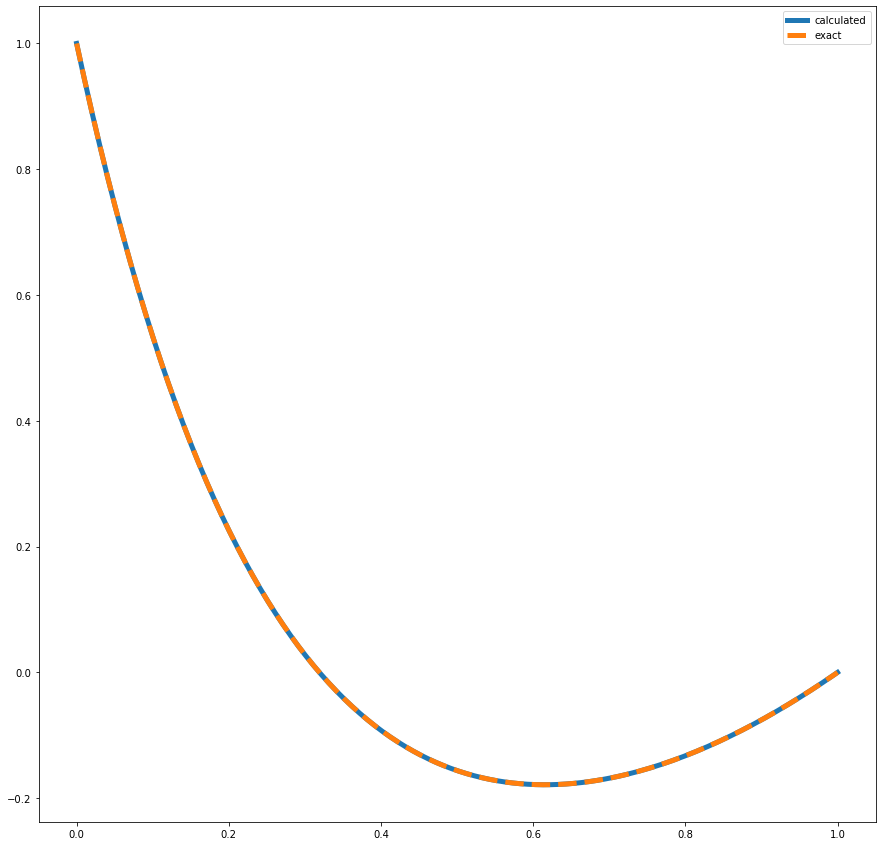

In [49]:
# visualizing the solutions
plt.figure(figsize=(15, 15))
plt.plot(x, y,"-", lw=5, label="calculated")
plt.plot(x, ytrue,"--",lw=5, label="exact")
plt.legend()

### Newton Raphson Shooting Method